# HR Attrition Analytics Prediction

## Problem Statement

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Aim/Target

For this exercise, our aim is predict the employee attrition.

### Introduction

To start with exercise, I have used IBM_HR_Attrition_Rate_Analytics Employee Attrition & Performance Dataset. The dataset includes features like Age, Employee Role, Daily Rate, Job Satisfaction, Years At Company, Years In Current Role etc. For this exercise, we will try to study the factors that lead to employee attrition.

## Data Collection (Loading data into Python)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn import svm
import sklearn
from sklearn.base import is_classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [54]:
hr_attr_df = pd.read_csv("HR_Employee_attrition.csv")

In [55]:
hr_df = pd.DataFrame() #Creating duplicate Dataframe (hr_df) for random operations
hr_df = hr_attr_df
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Wrangling (Data Cleaning)/(EDA):-

### Dimensions of the data

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [56]:
print(hr_df.shape)
print(hr_df.columns)

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### Checking Data Types of each columns

In [57]:
hr_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Checking Null values

In [58]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We do not have any null values in our dataset
In data, Most of the columns are numeric and remaining are object data type

It is important to see which variables are contibuting the most in attrition. But before that we need to know if the variable are any where correlated i.e Data Exploration

There are many continuous variables where the we can have a look at their distribution and create a grid of pairplot but that would be too much as there are so mnay variables.

### Identifying Column nature and usefulness for our target

##### checking unique values of each column to categorise

In [59]:
for column in hr_df.columns:
    if(hr_df[column].nunique()<2):
        print(f"{column}: Number of unique values {hr_df[column].nunique()}")

EmployeeCount: Number of unique values 1
Over18: Number of unique values 1
StandardHours: Number of unique values 1


Unique value is lessthan 2 means, those are equal to all records and there is no impact on dataset

'EmployeeCount','Over18','StandardHours' colums are having single values and as said above, we can remove these columns from dataset, along with, we explicitly know that 'employee number' column also no impact and we can remove from dataset

In [60]:
hr_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

## Data Analysis

##### Divide given data into three data frames, one is numeric, Categorical and continues dataframes for the sake of analysis

##### Creation of dataframe with numerical values

In [61]:
hr_df_num = hr_df[['Age','DailyRate','DistanceFromHome', 'Education','EnvironmentSatisfaction','HourlyRate',
                   'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']].copy()
hr_df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


##### Statistical view of numerical values

In [62]:
hr_df_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### plotting numerical values as histogram to check their distribution normal or skewed

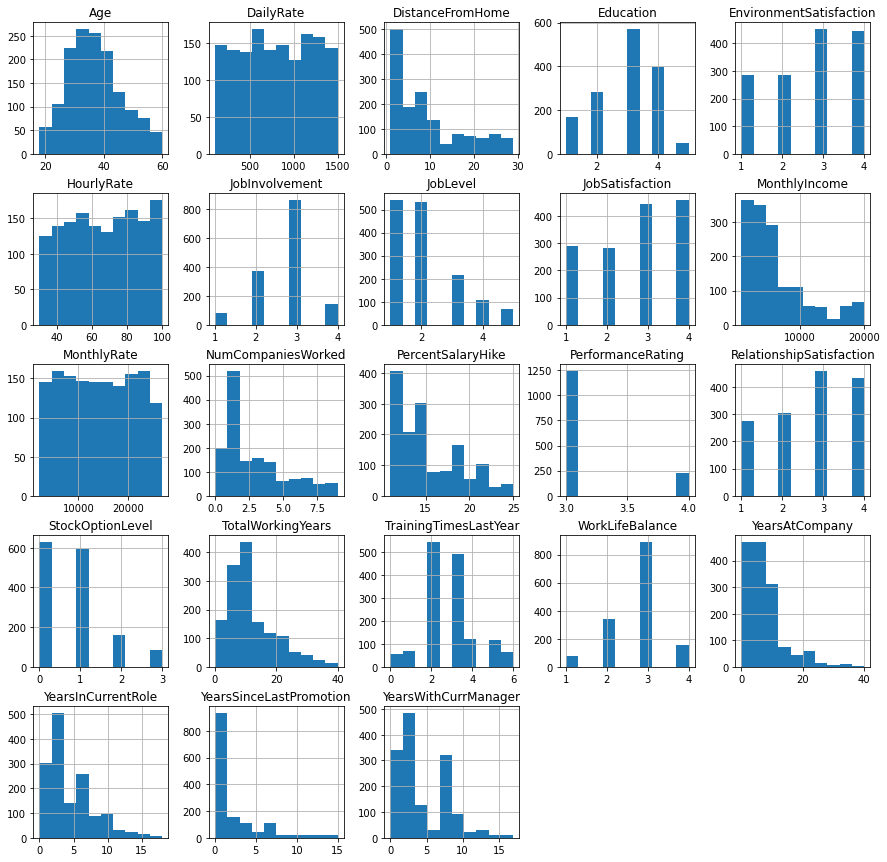

In [63]:
hr_df_num.hist(figsize=(15,15))
plt.show()

Several numerical features are right-skewed (e.g. DistanceFromHome, MonthlyIncome , YearsAtCompany, percentsalaryhike).
Data transformation methods are required to approach a normal distribution before fitting a model.
Age distribution is normal distribution.

###### creation of dataframe with Categorical values

In [64]:
#Copy categorical data
hr_df_cat = hr_df[['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
                       'OverTime']].copy()
hr_df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


## Feature Encoding

##### Encoding Categorical features

In [65]:
#Encoding Attrition column with label encoder as it has only two unique values
label = LabelEncoder()
hr_df_cat["Attrition"] = label.fit_transform(hr_df_cat.Attrition)
hr_df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [66]:
#using dummies for remaing categorical values
hr_df_cat = pd.get_dummies(hr_df_cat)
hr_df_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


#### final encoded data by concatinating numerical and categorical data frames

In [67]:
final_hr_df = pd.concat([hr_df_num, hr_df_cat], axis=1)
final_hr_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


## Correlation

Let’s take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

[]

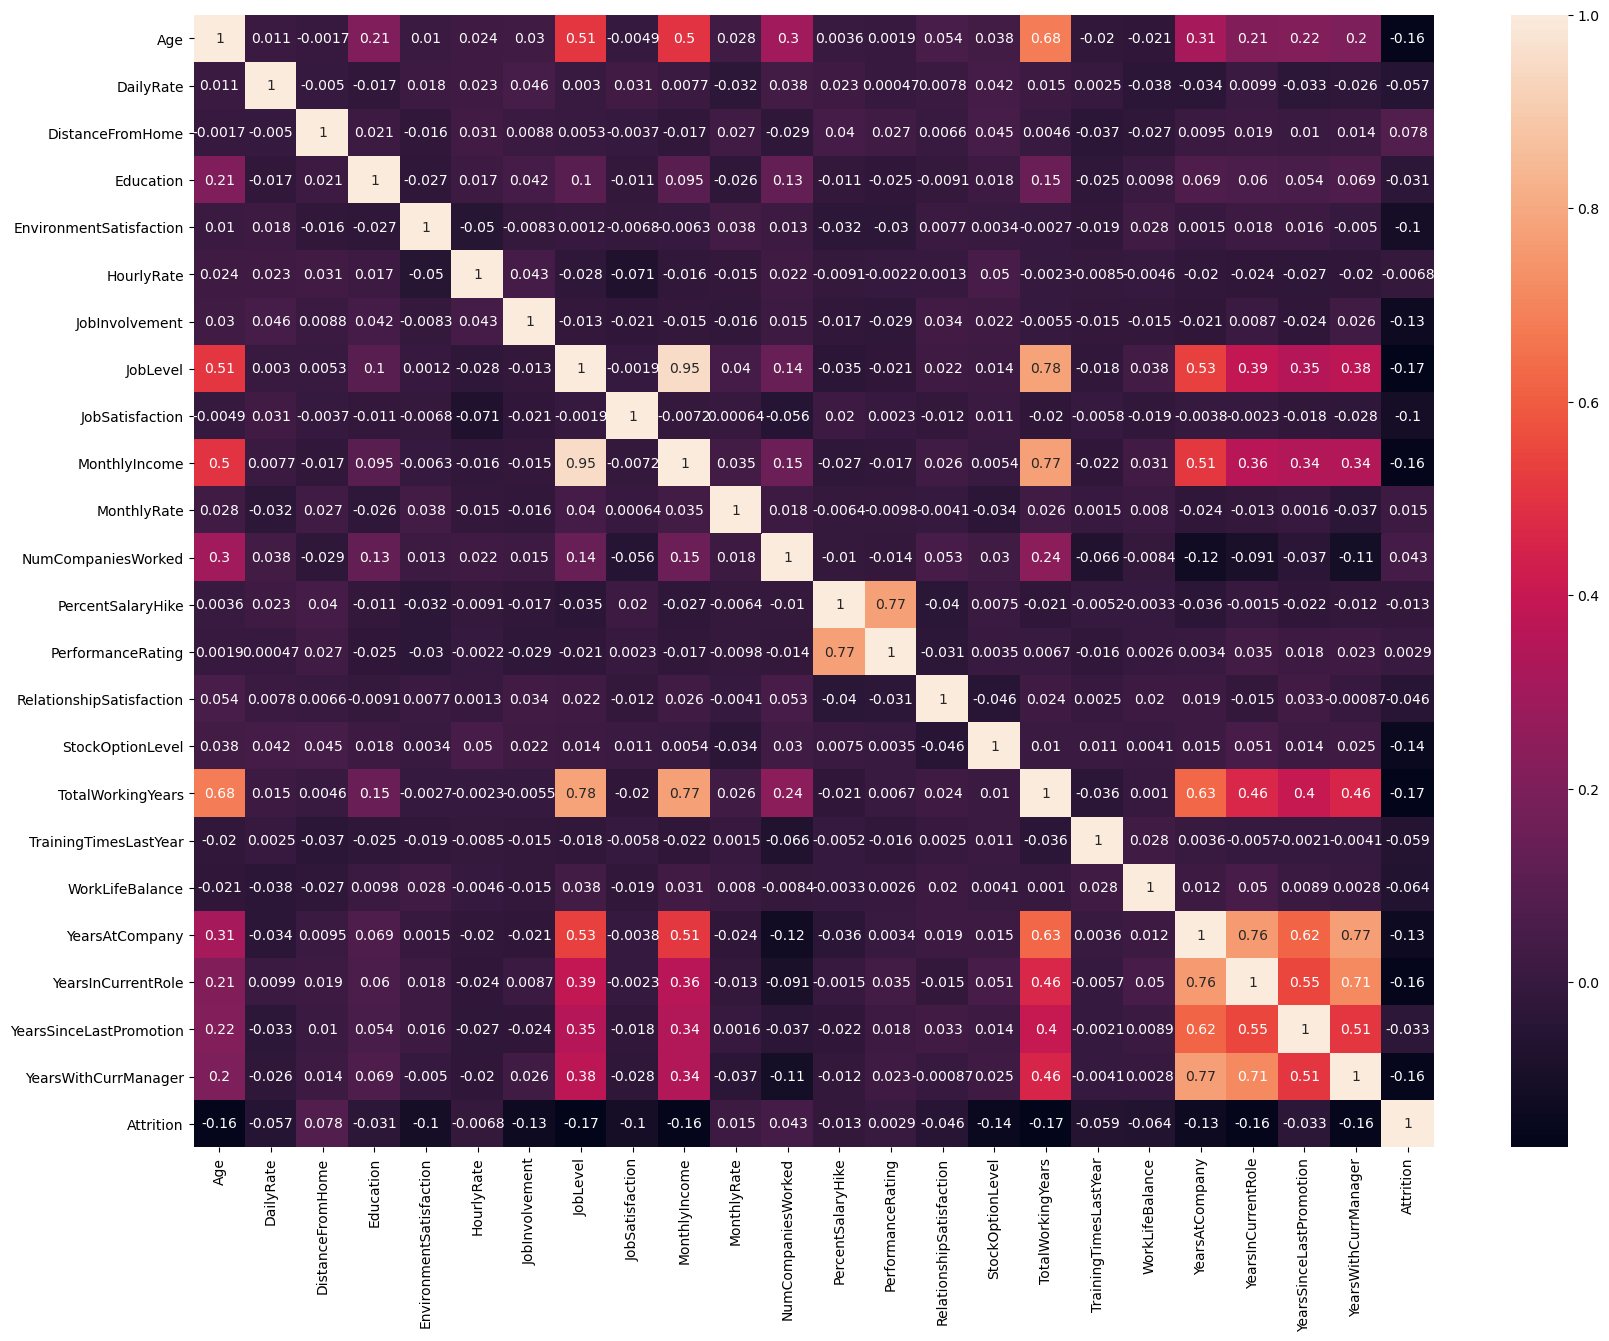

In [68]:
#here we checking correlation with our target feature Attrition, so we have added encoded Attrition to numerical variable data frame
hr_df_cor =pd.concat([hr_df_num, hr_df_cat['Attrition']], axis =1)
hr_df_cor = hr_df_cor.corr()
plt.figure(figsize=(20,15), dpi=100)
sns.heatmap(hr_df_cor, annot=True)
plt.plot()

#### Analysis of correlation results (sample analysis):

Monthly income is highly correlated with Job level.

Here we can see some intresting steps, “Monthly Rate”, “Number of Companies Worked” and “Distance From Home” are positively correlated to Attrition.

“Total Working Years”, “Job Level”, and “Years In Current Role” are negatively correlated to Attrition.

## Feature Scaling

Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [69]:
# import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
hr_scale = list(final_hr_df.columns)
hr_scale.remove('Attrition')
for col in hr_scale:
    final_hr_df[col] = final_hr_df[col].astype(float)
    final_hr_df[[col]] = scaler.fit_transform(final_hr_df[[col]])
final_hr_df['Attrition'] = pd.to_numeric(final_hr_df['Attrition'], downcast='float')
final_hr_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2.738095,3.579098,0.000000,1.25,1.666667,4.571429,3.333333,1.25,5.000000,1.312270,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,3.333333,2.214286,1.666667,1.25,1.666667,1.085045,...,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,5.000000,4.428571,1.666667,0.00,3.333333,0.284623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,5.000000,1.857143,3.333333,0.00,3.333333,0.500263,...,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
4,1.071429,1.750179,0.178571,0.00,0.000000,0.714286,3.333333,0.00,1.666667,0.647446,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0


In [70]:
final_hr_df.shape

(1470, 52)

## Data Visualization

In [71]:
col1 = []
for column in hr_df.columns:
    if hr_df[column].dtypes != object and hr_df[column].nunique() < 30:
        col1.append(column)

In [72]:
col12 = []
for column in hr_df.columns:
    if hr_df[column].dtypes != object and hr_df[column].nunique() > 30:
        col12.append(column)

### Plotting each column data in comparision with attrition to check the impact

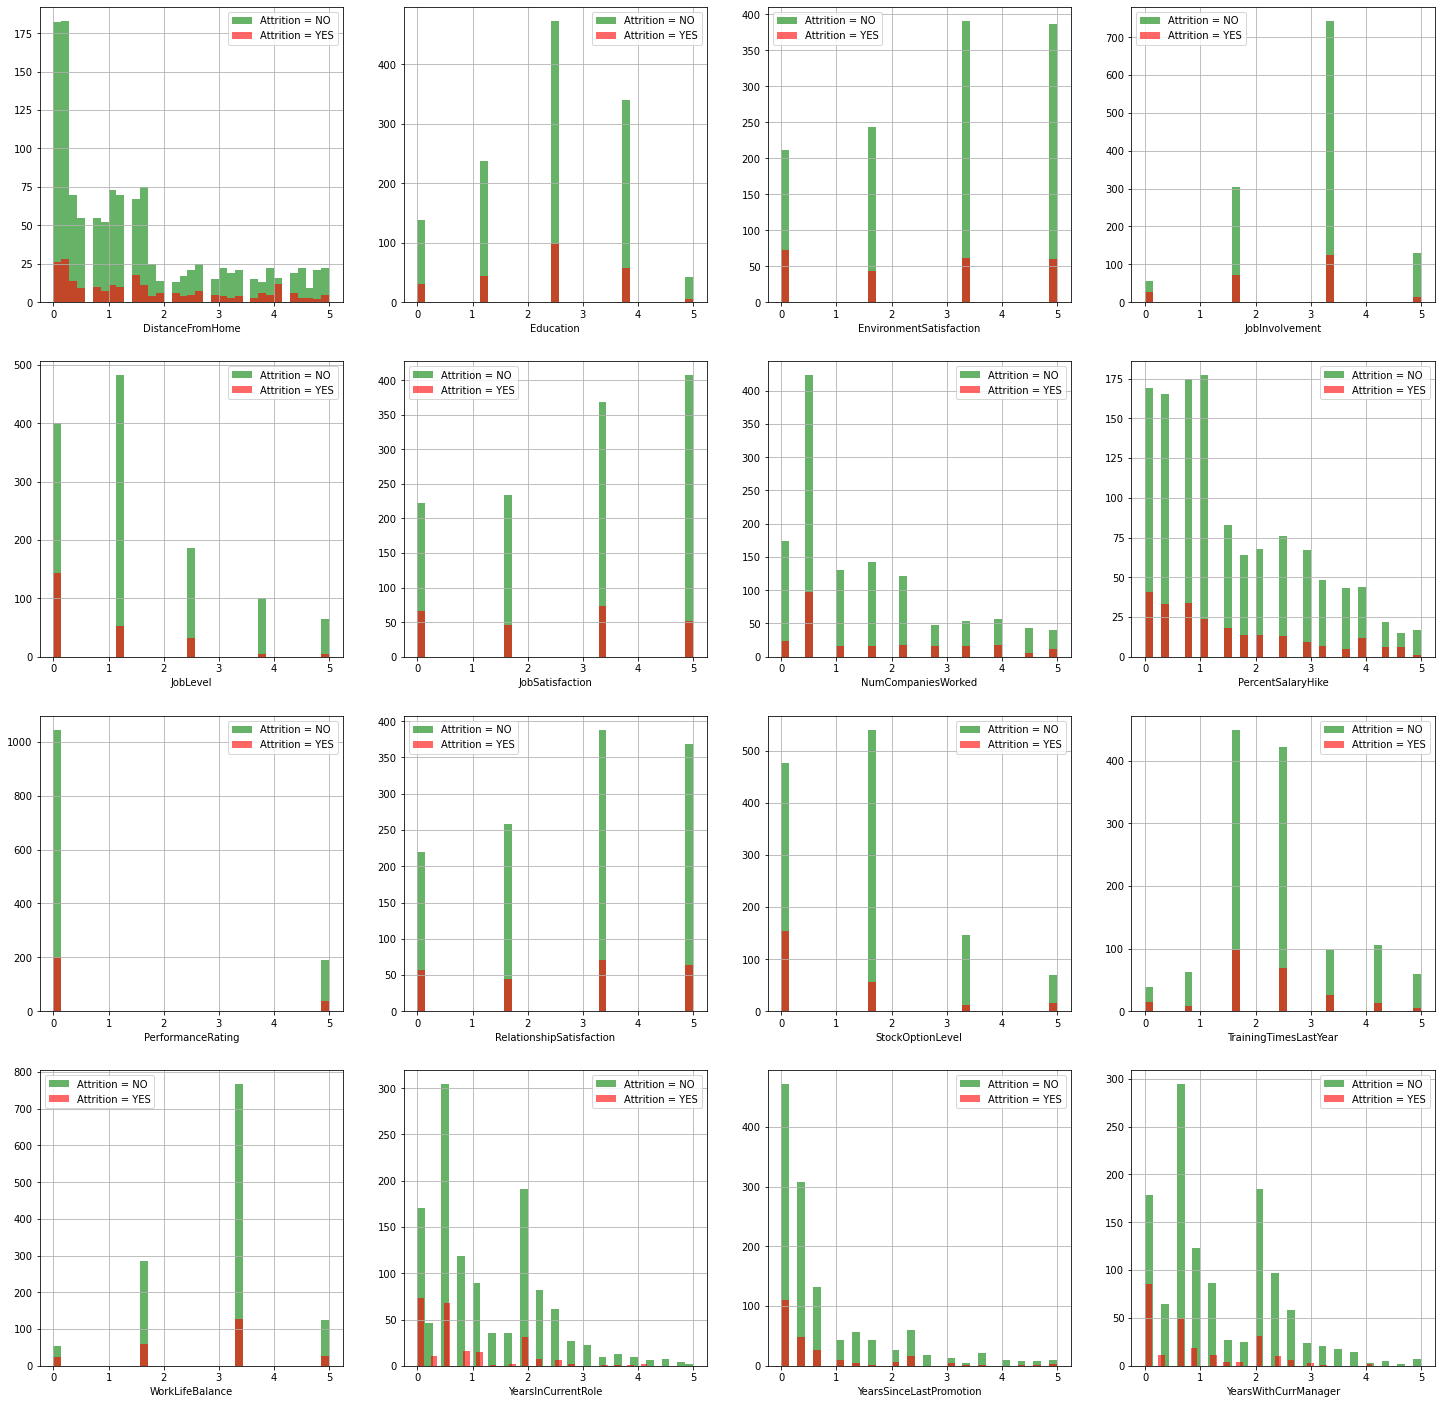

In [73]:
plt.figure(figsize=(25, 25))

for i, column in enumerate(col1, 1):
    plt.subplot(4, 4, i)
    final_hr_df[final_hr_df["Attrition"] == 0][column].hist(bins=35, color='Green', label='Attrition = NO', alpha=0.6)
    final_hr_df[final_hr_df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

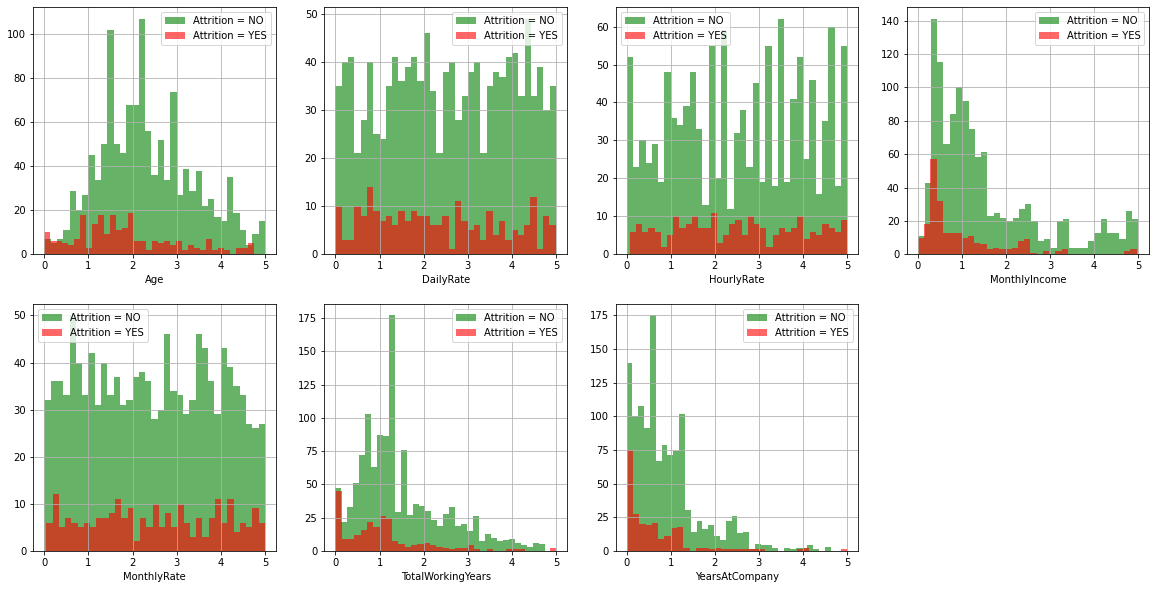

In [74]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(col12, 1):
    plt.subplot(2, 4, i)
    final_hr_df[final_hr_df["Attrition"] == 0][column].hist(bins=35, color='Green', label='Attrition = NO', alpha=0.6)
    final_hr_df[final_hr_df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

from the above visualization, EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have that much impact on the detrmination of Attrition of employees.

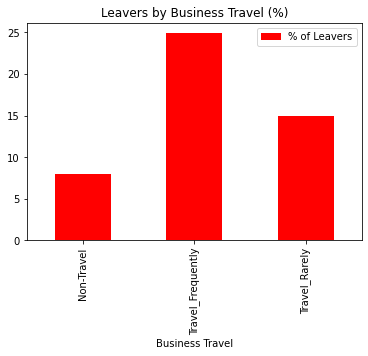

In [75]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(hr_df['BusinessTravel'].unique()):
    ratio = hr_df[(hr_df['BusinessTravel']==field)&(hr_df['Attrition']=="Yes")].shape[0] / hr_df[hr_df['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.plot(kind='bar',title='Leavers by Business Travel (%)', color = 'Red')

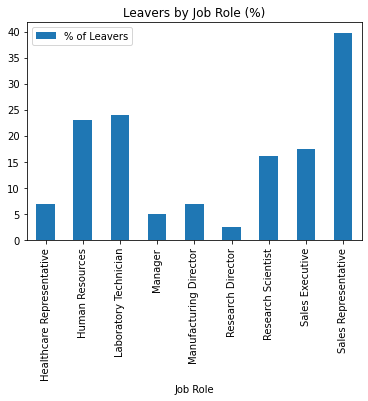

In [76]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(hr_df['JobRole'].unique()):
    ratio = hr_df[(hr_df['JobRole']==field)&(hr_df['Attrition']=="Yes")].shape[0] / hr_df[hr_df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.plot(kind='bar',title='Leavers by Job Role (%)')

### Now devided dataset into two types one is input and another is output

In [77]:
#Target variable as dataframe
df_y = final_hr_df['Attrition'].copy()

In [78]:
df_x = final_hr_df.drop(['Attrition'], axis = 1)

## Identifying best Model to predict

In [79]:
# selection of algorithms to consider and set performance measure
models = []
r_state =0
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=r_state,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=r_state)))
models.append(('SVM', SVC(gamma='auto', random_state=r_state)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=r_state)))
models.append(('Gaussian NB', GaussianNB()))

Now evaluate each model in turn and provide accuracy and standard deviation scores

In [80]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    for r_state in range(40,45):
        X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=r_state, stratify=df_y)
        kfold = model_selection.KFold(
            n_splits=10, random_state=r_state)  # 10-fold cross-validation

        cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
            model, X_train, y_train, cv=kfold, scoring='accuracy')

        cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
            model, X_train, y_train, cv=kfold, scoring='roc_auc')

        acc_results.append(cv_acc_results)
        auc_results.append(cv_auc_results)
        names.append(name)
        df_results.loc[i] = [name,
                             round(cv_auc_results.mean()*100, 2),
                             round(cv_auc_results.std()*100, 2),
                             round(cv_acc_results.mean()*100, 2),
                             round(cv_acc_results.std()*100, 2)
                             ]
        i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.62,4.83,76.52,3.51
1,Logistic Regression,82.24,4.62,75.21,5.48
4,Logistic Regression,82.00,6.17,75.81,4.33
2,Logistic Regression,81.61,6.22,76.33,4.09
3,Logistic Regression,81.51,4.24,75.01,3.14
5,Random Forest,80.08,5.01,85.47,3.61
7,Random Forest,79.99,7.62,86.17,3.28
6,Random Forest,79.57,7.49,85.78,4.00
9,Random Forest,78.56,5.68,85.58,4.57
8,Random Forest,77.38,6.24,84.97,4.22


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

#### From the above table, we came to conclude that Logistic Regression and Random Forest are the best models to predict

In [81]:
model = LogisticRegression(solver='liblinear', random_state=r_state,class_weight='balanced')
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc, test_xc, train_yc, test_yc = train_test_split(df_x,df_y,random_state = r_state,test_size = 0.33)
    kfold = model_selection.KFold(n_splits=10, random_state=r_state)
    modelCV = LogisticRegression()
    modelCV.fit(train_xc,train_yc)
    pre_c = modelCV.predict(test_xc)
    ac_sc= accuracy_score(test_yc,pre_c)
    print('accuracy score correspond to random state ' , r_state, 'is ' , ac_sc)
    if ac_sc> max_accuracy_score:
        scoring = 'roc_auc'
        results = model_selection.cross_val_score(modelCV, train_xc, train_yc, cv=kfold, scoring=scoring)
        max_accuracy_score=ac_sc
        final_state = r_state
        final_model = modelCV
        
            
print()
print()
print()
print()
print('max accuracy score correspond to random state ' , final_state, 'is ', max_accuracy_score, " and model is ", final_model)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

accuracy score correspond to random state  40 is  0.8868312757201646
accuracy score correspond to random state  41 is  0.8868312757201646
accuracy score correspond to random state  42 is  0.8703703703703703
accuracy score correspond to random state  43 is  0.8847736625514403
accuracy score correspond to random state  44 is  0.8847736625514403
accuracy score correspond to random state  45 is  0.8683127572016461
accuracy score correspond to random state  46 is  0.8827160493827161
accuracy score correspond to random state  47 is  0.8868312757201646
accuracy score correspond to random state  48 is  0.8786008230452675
accuracy score correspond to random state  49 is  0.8744855967078189
accuracy score correspond to random state  50 is  0.8724279835390947
accuracy score correspond to random state  51 is  0.8847736625514403
accuracy score correspond to random state  52 is  0.8703703703703703
accuracy score correspond to random state  53 is  0.8827160493827161
accuracy score correspond to rando

Let's take a closer look at above Logistic Regression algorithm. I used 10 n_splits for kfold Cross-Validation to train our Logistic Regression Model and estimate its AUC score.

### Tuning with GridSearchCV

In [82]:
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,random_state = 64,test_size = 0.33)
Lg = LogisticRegression(solver='liblinear', random_state=64, class_weight='balanced')
param_grid = {'C': np.arange(1e-03, 2, 0.01)}
gridsearch = GridSearchCV(LogisticRegression(solver='liblinear', class_weight="balanced", random_state=64), iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)
log_grid = gridsearch.fit(train_x, train_y)
log_opt = log_grid.best_estimator_
results = gridsearch.cv_results_

print('='*20)
print("best params: " + str(gridsearch.best_estimator_))
print("best params: " + str(gridsearch.best_params_))
print('best score:', gridsearch.best_score_)
print('='*20)

best params: LogisticRegression(C=0.040999999999999995, class_weight='balanced',
                   random_state=64, solver='liblinear')
best params: {'C': 0.040999999999999995}
best score: 0.8020128177791473


As shown above, the results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.


## Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

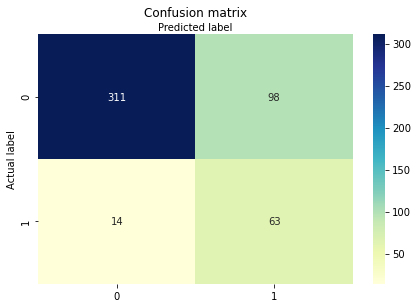

In [83]:
c_matrix = metrics.confusion_matrix(test_y, log_opt.predict(test_x))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 78.19


The Confusion matrix shows that we have 374 correct predictions and 112 incorrect predictions.
i.e., an accuracy of 78.19%.

In [85]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85       408
         1.0       0.39      0.74      0.52        78

    accuracy                           0.78       486
   macro avg       0.67      0.76      0.68       486
weighted avg       0.85      0.78      0.80       486



In [86]:
log_opt.fit(X_train, y_train) 
probs = log_opt.predict_proba(X_test) 
probs = probs[:, 1] 
logit_roc_auc = roc_auc_score(y_test, probs) 
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.852


The output provides a first index referring to the probability that the data belong to class 0 (employee not leaving), and the second refers to the probability that the data belong to class 1 (employee leaving).

The resulting AUC score is: 85.2 which is higher than that best score during the optimisation step.

## Random Forest Classifier

Using the Random Forest algorithm. fine-tune the Random Forest algorithm’s hyper-parameters by cross-validation against the AUC score.

In [87]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'max_features': ['auto', 'sqrt', 'log2'] 
             }

grid_obj = GridSearchCV(estimator = rf_classifier, param_grid=param_grid, cv=10)
grid_fit = grid_obj.fit(train_x, train_y)
print(grid_obj.best_params_)

{'max_features': 'auto', 'n_estimators': 75}


In [88]:
rf_opt = grid_fit.best_estimator_
print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', n_estimators=75, random_state=7)
best params: {'max_features': 'auto', 'n_estimators': 75}
best score: 0.8546794475365903


In [89]:
target = final_hr_df['Attrition']
features = final_hr_df.drop('Attrition', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=10)
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy
ac_sc = accuracy_score(y_test, test_pred)

print("Accuracy Score :", ac_sc*100)

Accuracy Score : 83.7448559670782


Random Forest identify which features are of the most importance in predicting the “Attrition” . Below, we plot features by their importance.

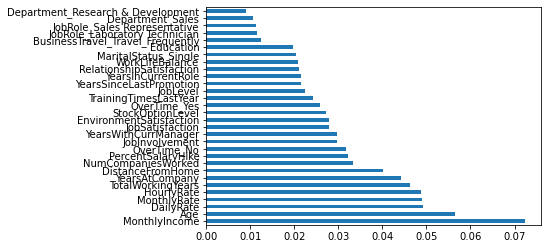

In [90]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(30)
feat_importances.plot(kind='barh')

#### Using Random Forest, we identify the Top 10 most important indicators as shown in the above table are :
MonthlyIncome, Age, MonthlyRate, DailyRate,  DistanceFromHome, TotalWorkingYears, YearsAtCompany,Job Satisfication, number of companies he worked.

In [91]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.073855
1,Age,0.059416
2,DailyRate,0.051648
3,TotalWorkingYears,0.050225
4,DistanceFromHome,0.047885
5,YearsAtCompany,0.044785
6,HourlyRate,0.042381
7,MonthlyRate,0.040295
8,YearsWithCurrManager,0.038790
9,YearsInCurrentRole,0.033838


The accuracy of the RandomForest Regression Classifier on test set is 83.74. Below the corresponding Confusion Matrix is shown.

Text(0.5, 257.44, 'Predicted label')

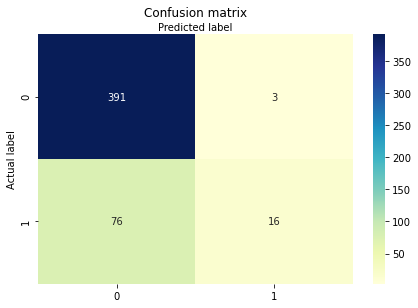

In [97]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [98]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 83.74


In [99]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       394
         1.0       0.84      0.17      0.29        92

    accuracy                           0.84       486
   macro avg       0.84      0.58      0.60       486
weighted avg       0.84      0.84      0.79       486



## AUC - ROC Graphs

AUC — ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

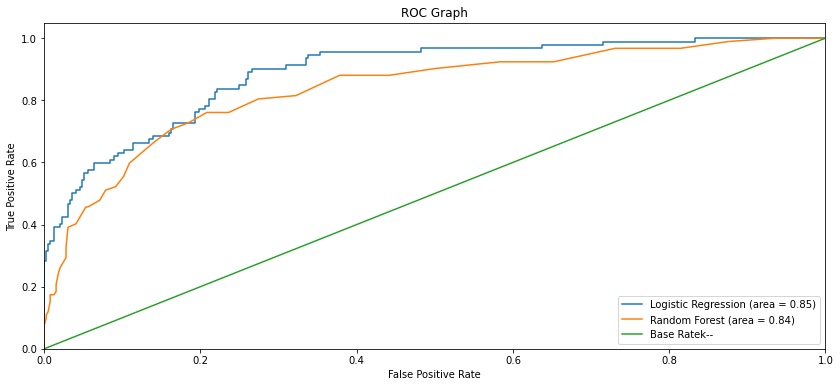

In [100]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

the fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier.

## Conclusion

### The stronger indicators of attrition include: 

#### Monthly Income:

Employees having higher wages are less intesion to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages or not.

#### Over Time:

Employees who work overtime are more intesion towards attrition. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce overtime impact on employees.

#### Age:

Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

#### DistanceFromHome:

Employees who live far from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area or in the form of Transportation allowance.

## Final Thoughts

A strategic retention plan can be drawn for each Risk Score group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee’s Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.